In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df= pd.read_csv(r"C:\Users\udita\Amazon Sales\Untitled spreadsheet - amazon (version 1).xlsb.csv", encoding='ISO-8859-1')


In [3]:
df['Brand_Name']=df['Brand_Name'].replace('Zebronics','ZEBRONICS')
df.head()


,product_id,Brand_Name,product_name,Category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07GQD4K6L,boAt,boAt Bassheads 100 in Ear Wired Earphones with...,WiredEarphones,379,999,62%,4.1,363713
1,B07GPXXNNG,boAt,boAt Bassheads 100 in Ear Wired Earphones with...,WiredEarphones,349,999,65%,4.1,363713
2,B071Z8M4KX,boAt,boAt BassHeads 100 in-Ear Wired Headphones wit...,WiredEarphones,365,999,63%,4.1,363711
3,B09GFPVD9Y,Redmi,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Smartphones,"8,499.00","10,999.00",23%,4.1,313836
4,B09GFLXVH9,Redmi,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",Smartphones,"6,499.00","8,499.00",24%,4.1,313836


The category of the product in the electronics field are as followed


In [5]:
Categories=df['Category'].value_counts().reset_index()
Categories.columns=['CategoryName', 'Count']
print(Categories)

          CategoryName  Count
0         SmartWatches     76
1          Televisions     69
2          Smartphones     69
3                Mouse     30
4       WiredEarphones     25
5              Earbuds     21
6             Speakers     13
7       GraphicTablets     11
8              Routers     10
9     HeadphonesOn-Ear     10
10  Keyboard&MouseSets     10
11             Cameras      9
12        BasicMobiles      9
13           Keyboards      8
14            neckband      6
15            Printers      5
16          PCHeadsets      4
17       PCMicrophones      2
18          PCSpeakers      2
19             Monitor      2
20             Laptops      1


In [6]:
BrandCategory=df.groupby(['Category','Brand_Name']).size().reset_index(name='Count')
print(BrandCategory)


           Category Brand_Name  Count
0      BasicMobiles       Lava      1
1      BasicMobiles   Motorola      2
2      BasicMobiles      Nokia      6
3           Cameras         CP      1
4           Cameras   Fujifilm      1
..              ...        ...    ...
130  WiredEarphones     realme      1
131        neckband      Boult      1
132        neckband      PTron      2
133        neckband  ZEBRONICS      1
134        neckband       boAt      2

[135 rows x 3 columns]


In [7]:
# total rating count per category 
TotalSales=df.groupby('Category')['rating_count'].sum().reset_index().sort_values(by='rating_count',ascending=False)
print(TotalSales)

              Category  rating_count
19      WiredEarphones       3022832
16         Smartphones       2496155
15        SmartWatches       1644476
2              Earbuds        775685
18         Televisions        774455
4     HeadphonesOn-Ear        611111
0         BasicMobiles        550259
9                Mouse        473357
20            neckband        406422
14             Routers        323517
17            Speakers        271313
1              Cameras        188466
5   Keyboard&MouseSets        161991
6            Keyboards        110796
13            Printers         50078
3       GraphicTablets         37958
10          PCHeadsets         36701
11       PCMicrophones         17773
12          PCSpeakers         12547
8              Monitor          4637
7              Laptops           323


from the above observation we can see that the overall wired earphones have highest sales according to our data

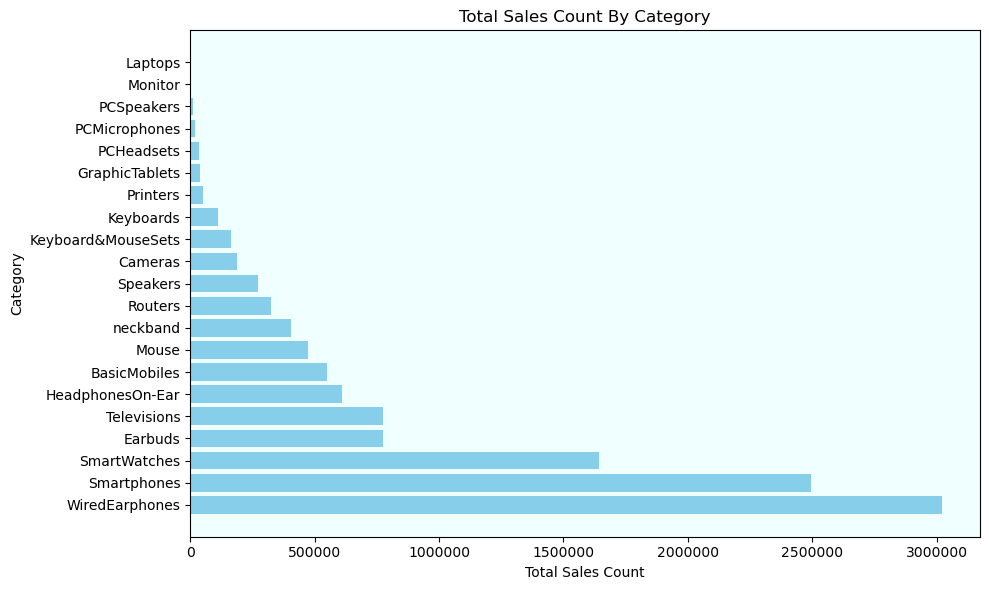

In [9]:
plt.figure(figsize=(10,6))
plt.barh(TotalSales['Category'],TotalSales['rating_count'],color='skyblue')
plt.xlabel('Total Sales Count')
plt.ylabel('Category')
plt.gca().set_facecolor('#f0ffff')
plt.ticklabel_format(style='plain', axis='x')  
plt.title('Total Sales Count By Category')
plt.tight_layout()
plt.show()

This Graph shows that the total sales of wired earphones is highest among all folloed by smart phones and smartwatches so according to out dataset and total sales per category we can say that WiredEarphones is the higest selling and most demanding category

To get the more fair result we will take average rating per product to get the better insight of the data

In [12]:
grouped=df.groupby('Category')['rating_count'].agg(['sum','count']).reset_index()
grouped.columns=['Category','TotalRatingCount', 'ProductCount']
grouped['AvgRatingCount']=round(grouped['TotalRatingCount']/grouped['ProductCount'],1)
Sort=grouped.sort_values(by= 'AvgRatingCount',ascending=False)
print(Sort)

              Category  TotalRatingCount  ProductCount  AvgRatingCount
19      WiredEarphones           3022832            25        120913.3
20            neckband            406422             6         67737.0
0         BasicMobiles            550259             9         61139.9
4     HeadphonesOn-Ear            611111            10         61111.1
2              Earbuds            775685            21         36937.4
16         Smartphones           2496155            69         36176.2
14             Routers            323517            10         32351.7
15        SmartWatches           1644476            76         21637.8
1              Cameras            188466             9         20940.7
17            Speakers            271313            13         20870.2
5   Keyboard&MouseSets            161991            10         16199.1
9                Mouse            473357            30         15778.6
6            Keyboards            110796             8         13849.5
18    

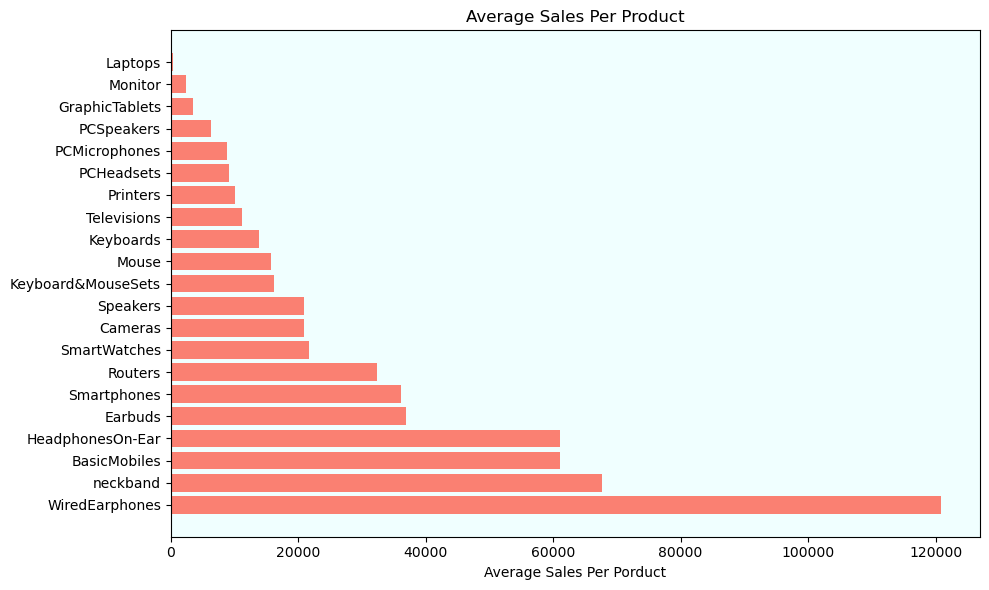

In [13]:
plt.figure(figsize=(10,6))
plt.barh(Sort['Category'],Sort['AvgRatingCount'],color='salmon')
plt.xlabel('Average Sales Per Porduct')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().set_facecolor('#f0ffff')
plt.title('Average Sales Per Product')
plt.tight_layout()
plt.show()


The Average Sales also conclude the same result as total sales so now we can say that the most demanding category on amazon according to dataset is WiredEarphones. We are taking average sales in consideration because range of prodcut per category is very high of some category, like smartphones has more ranges than neckband so average gives us a number which say rating per product on the basis of that we can say that the result is not baised based on the number of product per 


The product which are most selling in the elctronics category is wiredEarphones and Neckband considering both have few ranges of product as compared to smartwatches and smartphones

In [16]:
Wired = df[df['Category']=='WiredEarphones']
WiredSalesByBrand=Wired.groupby('Brand_Name')['rating_count'].sum().reset_index().sort_values(by='rating_count',ascending=False)
print(WiredSalesByBrand)

   Brand_Name  rating_count
7        boAt       1855700
1         JBL        724409
5      Xiaomi        119466
4  Sennheiser         98250
0       Boult         78200
3     Samsung         63078
8      realme         37817
6   ZEBRONICS         27710
2       PTron         18202


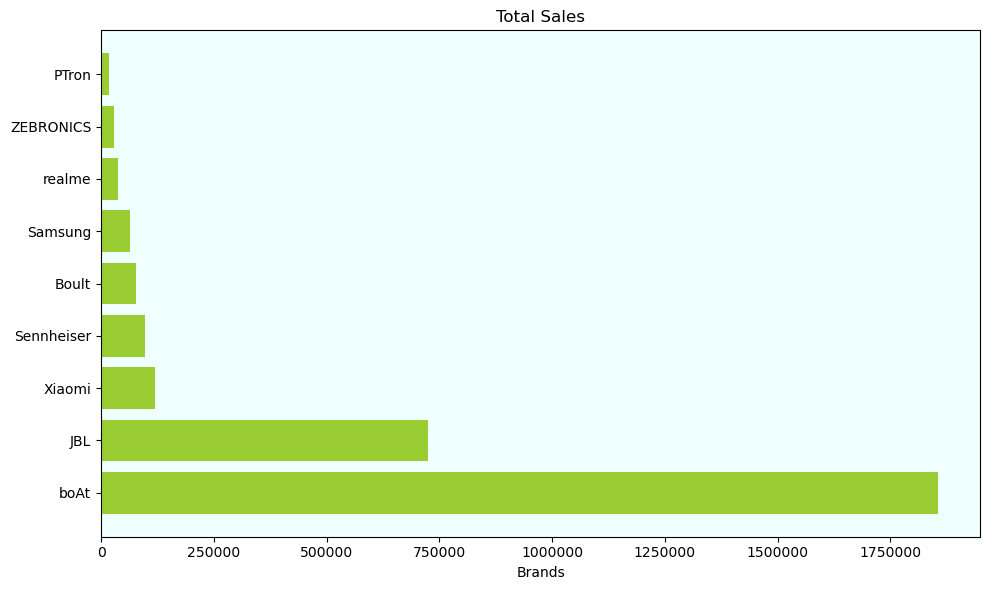

In [17]:
plt.figure(figsize=(10,6))
plt.barh(WiredSalesByBrand['Brand_Name'],WiredSalesByBrand['rating_count'],color='yellowgreen')
plt.xlabel('Brands')
plt.gca().set_facecolor('#f0ffff')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total Sales')
plt.tight_layout()
plt.show()

The above data shows the total rating count is highest of boAt. The seoncd highest is JBL.

In [19]:
grouped2=Wired.groupby('Brand_Name')['rating_count'].agg(['sum','count']).reset_index()
grouped2.columns=['Brand_Name','TotalRatingCount', 'ProductCount']
grouped2['AvgRatingCount']=round(grouped2['TotalRatingCount']/grouped2['ProductCount'],1)
Sort2=grouped2.sort_values(by= 'AvgRatingCount',ascending=False)
print(Sort2)

   Brand_Name  TotalRatingCount  ProductCount  AvgRatingCount
7        boAt           1855700             9        206188.9
1         JBL            724409             5        144881.8
5      Xiaomi            119466             1        119466.0
4  Sennheiser             98250             1         98250.0
0       Boult             78200             2         39100.0
8      realme             37817             1         37817.0
3     Samsung             63078             2         31539.0
2       PTron             18202             1         18202.0
6   ZEBRONICS             27710             3          9236.7


Average Sales Also says the same thing. We are on the right track

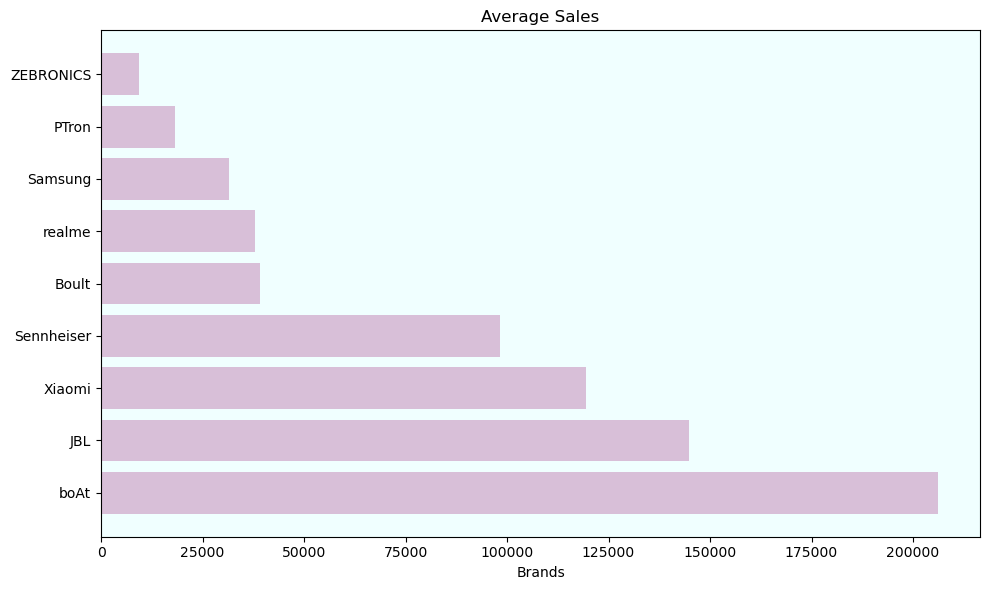

In [21]:
plt.figure(figsize=(10,6))
plt.barh(Sort2['Brand_Name'],Sort2['AvgRatingCount'],color='thistle')
plt.xlabel('Brands')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().set_facecolor('#f0ffff')
plt.title('Average Sales')
plt.tight_layout()
plt.show()

Average Sales Also indicates that the boAt is the top performer Brand Wise

In [23]:
BrandRating=Wired.groupby(['Brand_Name', 'rating']).size().reset_index(name='Count')
BrandSorted=BrandRating.sort_values(by=['rating','Count'],ascending=[False,False])
print(BrandSorted)

    Brand_Name  rating  Count
4      Samsung     4.2      2
11        boAt     4.2      2
10        boAt     4.1      7
2          JBL     4.1      4
5   Sennheiser     4.1      1
6       Xiaomi     4.1      1
12      realme     4.0      1
0        Boult     3.9      2
1          JBL     3.9      1
3        PTron     3.6      1
9    ZEBRONICS     3.6      1
8    ZEBRONICS     3.5      1
7    ZEBRONICS     3.4      1


Samsung and boAt has same rating but the sales of boAt is more than samsung


In [25]:
df['discounted_price'] = df['discounted_price'].astype(str) \
    .str.replace('₹', '', regex=False) \
    .str.replace(',', '', regex=False) \
    .astype(float)
print(df['discounted_price'].head())



0     379.0
1     349.0
2     365.0
3    8499.0
4    6499.0
Name: discounted_price, dtype: float64


In [26]:
avg_discount_price = df[df['Category'] == 'WiredEarphones']  .groupby('Brand_Name')['discounted_price'] .mean() .round(1) .sort_values(ascending=False)

print(avg_discount_price)


Brand_Name
Sennheiser    1490.0
Samsung        724.0
JBL            619.0
boAt           454.8
Xiaomi         429.0
Boult          414.0
realme         399.0
PTron          299.0
ZEBRONICS      249.0
Name: discounted_price, dtype: float64


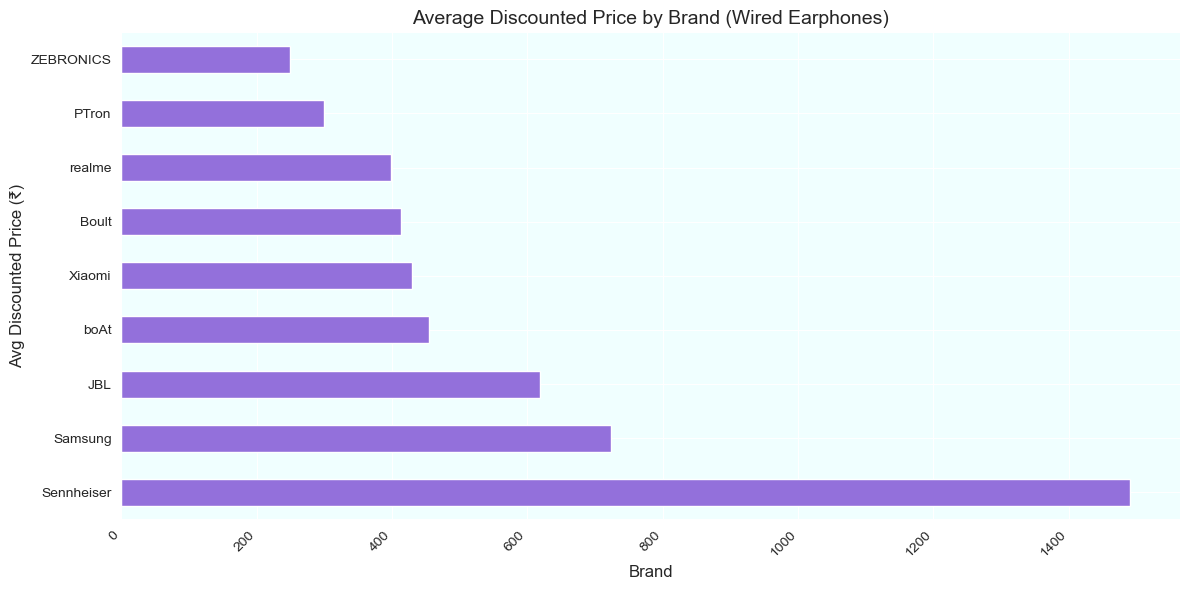

In [56]:
plt.figure(figsize=(12,6))
avg_discount_price.plot(kind='barh', color='mediumpurple')
plt.title('Average Discounted Price by Brand (Wired Earphones)', fontsize=14)
plt.gca().set_facecolor('#f0ffff')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Avg Discounted Price (₹)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

According to the sales of product the top selling 3  brands in wired earphones category were boAt, JBL, Xiaomi. So we will be comparing price of only those product.

In [29]:
AvgTopBrands=Wired.groupby('Brand_Name')['rating_count'].mean().sort_values(ascending=False).head(3).round(1)
print(AvgTopBrands)

Brand_Name
boAt      206188.9
JBL       144881.8
Xiaomi    119466.0
Name: rating_count, dtype: float64


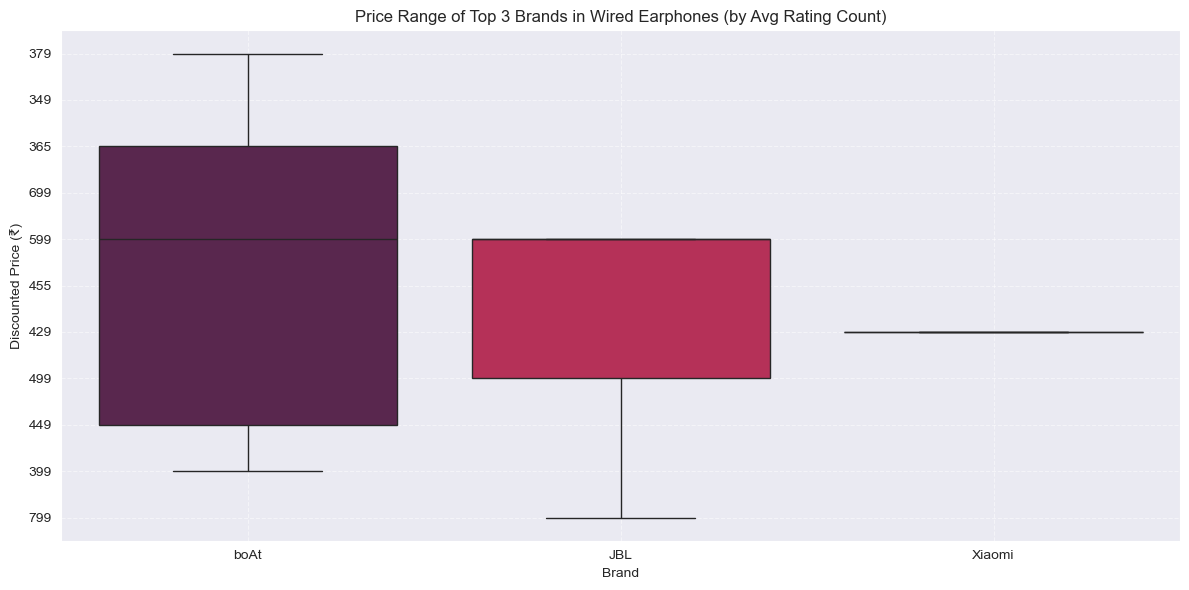

In [30]:
top_3_brands = AvgTopBrands.index.tolist()
Top3Brands= Wired[Wired['Brand_Name'].isin(top_3_brands)]
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.boxplot(x='Brand_Name', y='discounted_price', data=Top3Brands, palette='rocket',hue= 'Brand_Name',legend=False)
plt.title('Price Range of Top 3 Brands in Wired Earphones (by Avg Rating Count)')
plt.ylabel('Discounted Price (₹)')
plt.xlabel('Brand')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The above boxplot graph shows the price range of the top selling WiredEarphones 

Xiaomi flatline tells there is not a range of prodcut of this brand in this category but its there sue to its high rating cout aka proxy for sales count 


The top performed brand in this category is boAt and its price range lies between 400 to 700 

So based on all the observation and values we can conclude that our Client can focus on WiredEarphone due to its high demand, multiple product offering and proven performance in datset. The price on which the client can launch its product is 400 to 700

Further more we can also do some more digging in the data to know whether the high demand of this prodcut or brand is due to its discounted price or high rating 